In [2]:
# Imports
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid", context="notebook", rc={"figure.figsize": (10,6)})
pd.set_option('display.max_columns', None)
DATA_DIR = Path('../data')

In [3]:
#load data
country = "togo-dapaong_qc"   
fn = DATA_DIR / f"{country}.csv"
df = pd.read_csv(fn, parse_dates=['Timestamp'])
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [4]:
# Basic info & missing
display(df.info())
display(df.describe(include='all').T)   # numeric summary
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df))*100
missing_df = pd.concat([missing, missing_pct], axis=1)
missing_df.columns = ['missing_count','missing_pct']
missing_df[missing_df['missing_pct']>0]
# List columns with >5% nulls
missing_df[missing_df['missing_pct']>5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

None

,count,mean,min,25%,50%,75%,max,std
Timestamp,525600,2022-04-25 12:00:30.000000768,2021-10-25 00:01:00,2022-01-24 06:00:45,2022-04-25 12:00:30,2022-07-25 18:00:15,2022-10-25 00:00:00,NaN
GHI,525600.0,230.55504,-12.7,-2.2,2.1,442.4,1424.0,322.532347
DNI,525600.0,151.258469,0.0,0.0,0.0,246.4,1004.5,250.956962
DHI,525600.0,116.444352,0.0,0.0,2.5,215.7,805.7,156.520714
ModA,525600.0,226.144375,0.0,0.0,4.4,422.525,1380.0,317.346938
ModB,525600.0,219.568588,0.0,0.0,4.3,411.0,1367.0,307.93251
Tamb,525600.0,27.751788,14.9,24.2,27.2,31.1,41.4,4.758023
RH,525600.0,55.01316,3.3,26.5,59.3,80.8,99.8,28.778732
WS,525600.0,2.368093,0.0,1.4,2.2,3.2,16.1,1.462668
WSgust,525600.0,3.22949,0.0,1.9,2.9,4.4,23.1,1.882565


,missing_count,missing_pct
Comments,525600,100.0


In [5]:
# Z-score outlier detection
cols_for_z = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
z_df = df[cols_for_z].apply(lambda x: stats.zscore(x.dropna()), axis=0)
# zscore returns NaN aligned to dropna; easier do per column
outlier_flags = pd.DataFrame(index=df.index)
for c in cols_for_z:
    outlier_flags[c+'_z'] = np.abs(stats.zscore(df[c].astype(float), nan_policy='omit')) > 3

# rows with any outlier True
outlier_rows = outlier_flags.any(axis=1)
print("Outliers (|Z|>3) count:", outlier_rows.sum())
df[outlier_rows].shape


Outliers (|Z|>3) count: 9251


(9251, 19)

In [6]:
# Impute medians for key numeric columns
key_cols = ['GHI','DNI','DHI','ModA','ModB','Tamb','RH','WS','WSgust']
for c in key_cols:
    if df[c].isna().sum()>0:
        df[c] = df[c].fillna(df[c].median())


In [7]:
# Export cleaned file
clean_fn = DATA_DIR / f"{country}_clean.csv"
df.to_csv(clean_fn, index=False)
print("Saved cleaned data to:", clean_fn)


Saved cleaned data to: ..\data\togo-dapaong_qc_clean.csv


In [8]:
# Ensure Timestamp is datetime and set index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp').sort_index()


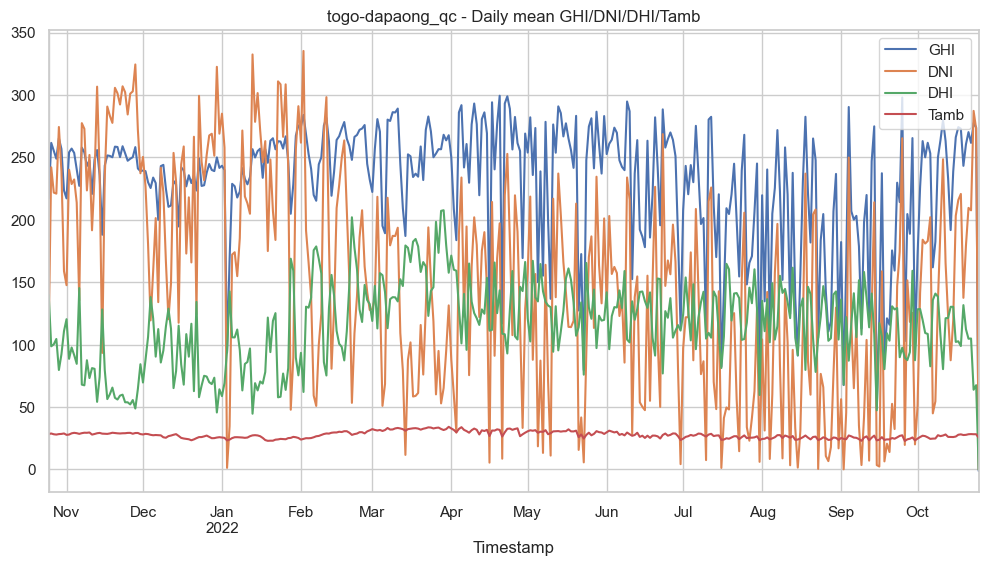

In [9]:
# Daily plot (sample timeframe)
df[['GHI','DNI','DHI','Tamb']].resample('D').mean().plot(subplots=False, figsize=(12,6))
plt.title(f"{country} - Daily mean GHI/DNI/DHI/Tamb")
plt.show()


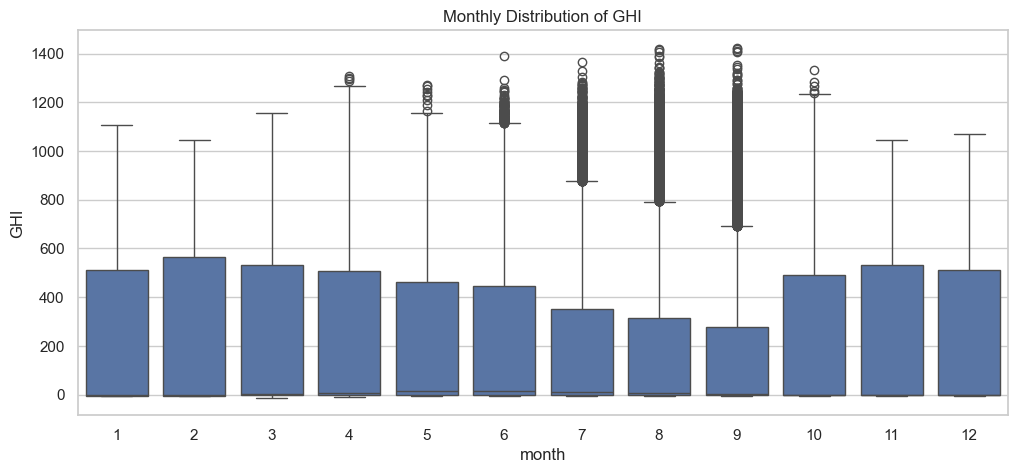

In [10]:
# Monthly boxplot of GHI
df['month'] = df.index.month
plt.figure(figsize=(12,5))
sns.boxplot(x='month', y='GHI', data=df.reset_index())
plt.title('Monthly Distribution of GHI')
plt.show()


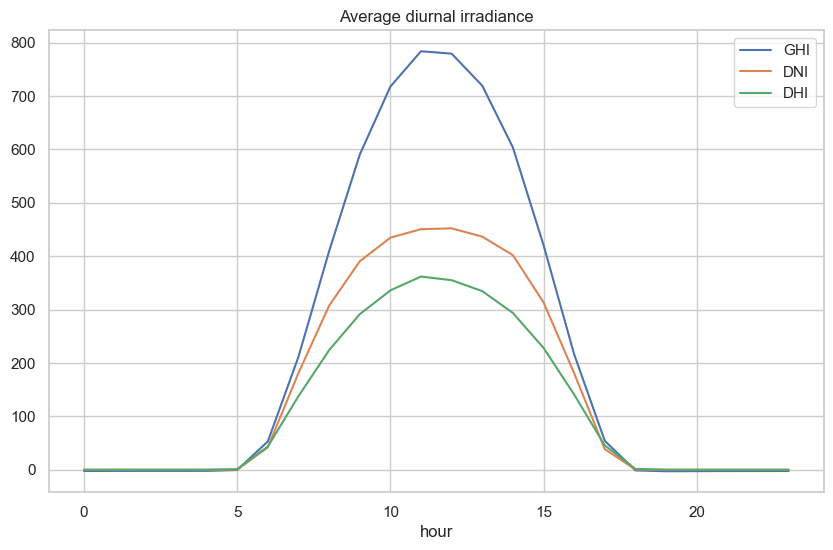

In [11]:
#  Hourly average
df['hour'] = df.index.hour
hourly = df.groupby('hour')[['GHI','DNI','DHI']].mean()
hourly.plot()
plt.title('Average diurnal irradiance')
plt.show()


,ModA,ModB
Cleaning,,
0,225.979064,219.401351
1,535.186477,532.211744


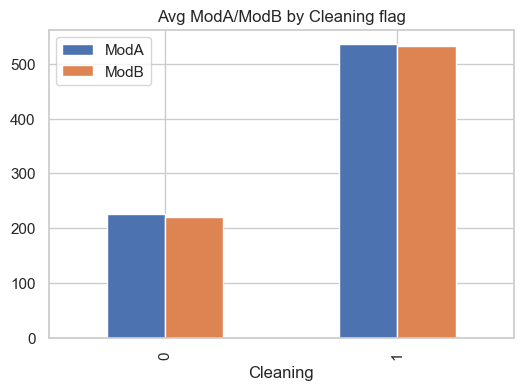

In [12]:
# Cleaning impact
df_reset = df.reset_index()
grouped = df_reset.groupby('Cleaning')[['ModA','ModB']].mean()
display(grouped)
grouped.plot(kind='bar', figsize=(6,4), title='Avg ModA/ModB by Cleaning flag')
plt.show()


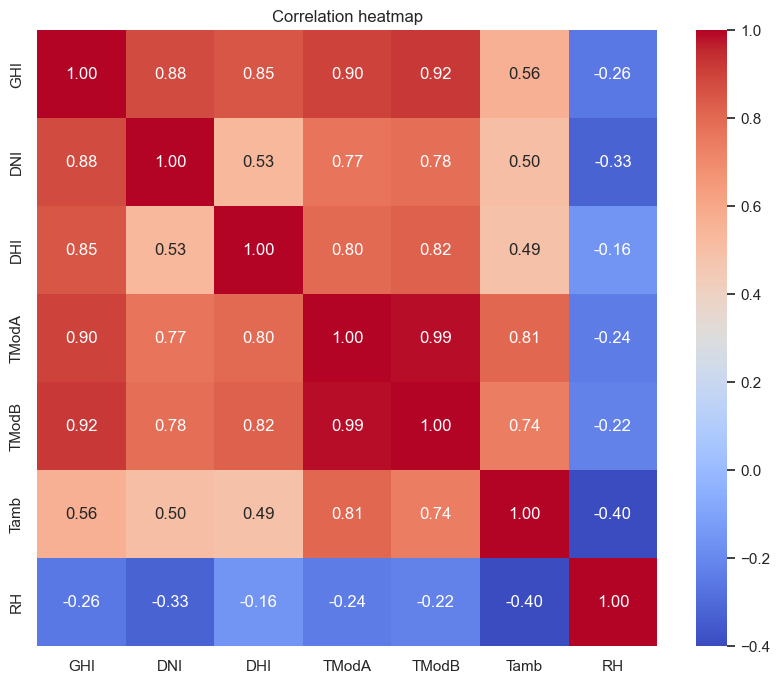

In [13]:
# Correlation heatmap
corr_cols = ['GHI','DNI','DHI','TModA','TModB','Tamb','RH']
plt.figure(figsize=(10,8))
sns.heatmap(df[corr_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()


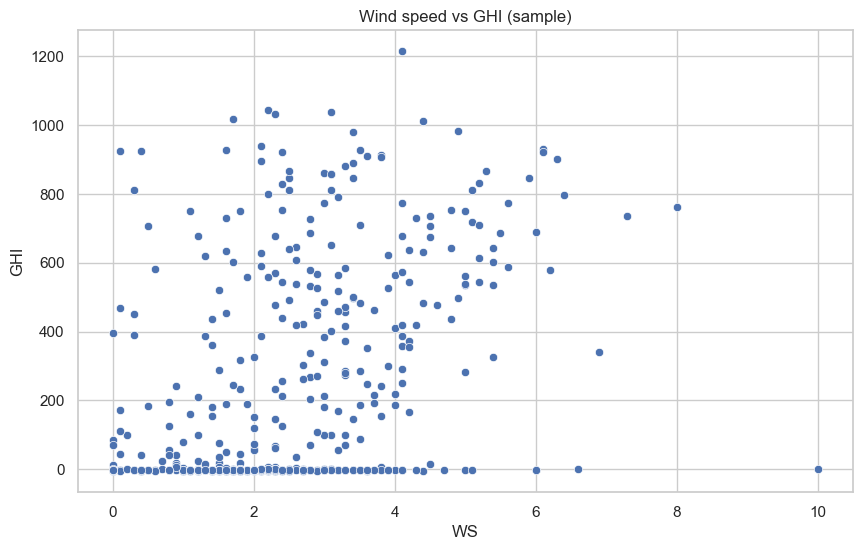

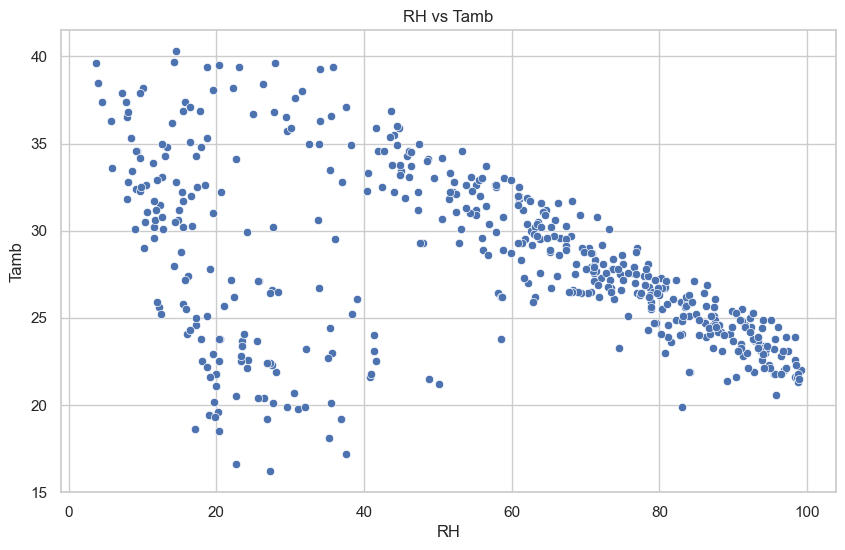

In [14]:
#  Scatter examples
sns.scatterplot(x='WS', y='GHI', data=df.sample(500))
plt.title('Wind speed vs GHI (sample)')
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=df.sample(500))
plt.title('RH vs Tamb')
plt.show()


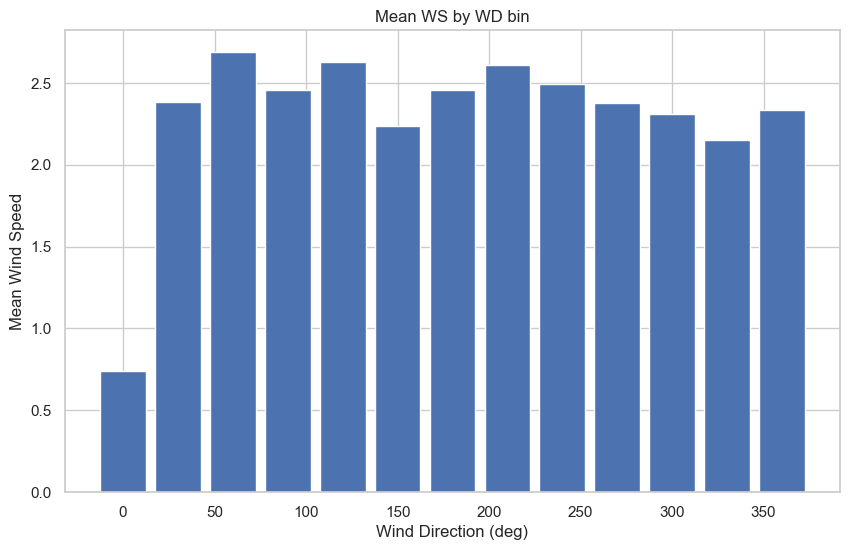

In [15]:
#  Wind direction bins and mean WS
df_wind = df.reset_index().dropna(subset=['WD','WS'])
df_wind['WD_bin'] = (df_wind['WD'] // 30) * 30   # 12 bins of 30deg
wind_summary = df_wind.groupby('WD_bin')['WS'].mean().reset_index()
plt.bar(wind_summary['WD_bin'], wind_summary['WS'], width=25)
plt.xlabel('Wind Direction (deg)')
plt.ylabel('Mean Wind Speed')
plt.title('Mean WS by WD bin')
plt.show()


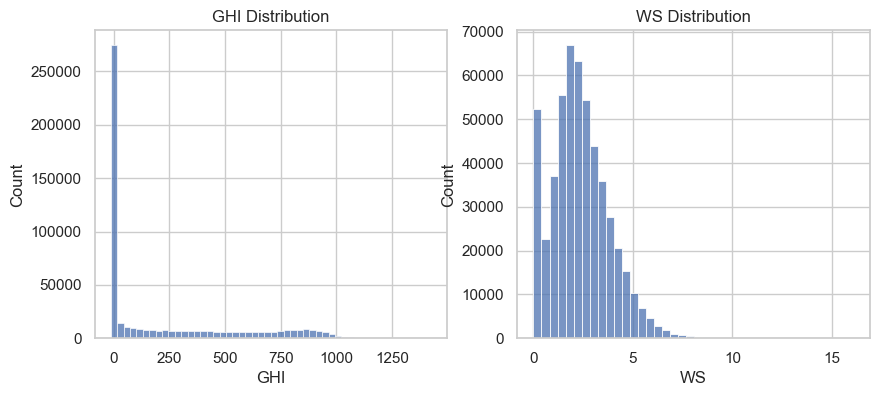

In [16]:
#  Histograms
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['GHI'].dropna(), bins=50)
plt.title('GHI Distribution')
plt.subplot(1,2,2)
sns.histplot(df['WS'].dropna(), bins=40)
plt.title('WS Distribution')
plt.show()


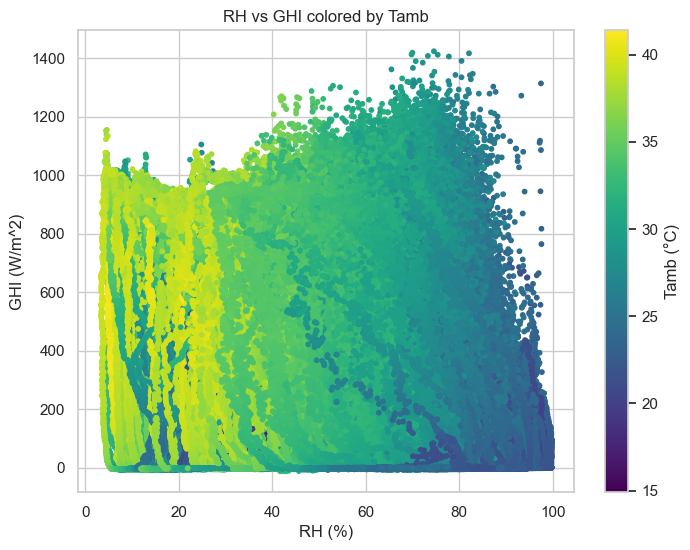

In [17]:
#  RH vs GHI scatter (color by Tamb)
plt.figure(figsize=(8,6))
plt.scatter(df['RH'], df['GHI'], c=df['Tamb'], cmap='viridis', s=10)
plt.colorbar(label='Tamb (°C)')
plt.xlabel('RH (%)'); plt.ylabel('GHI (W/m^2)')
plt.title('RH vs GHI colored by Tamb')
plt.show()


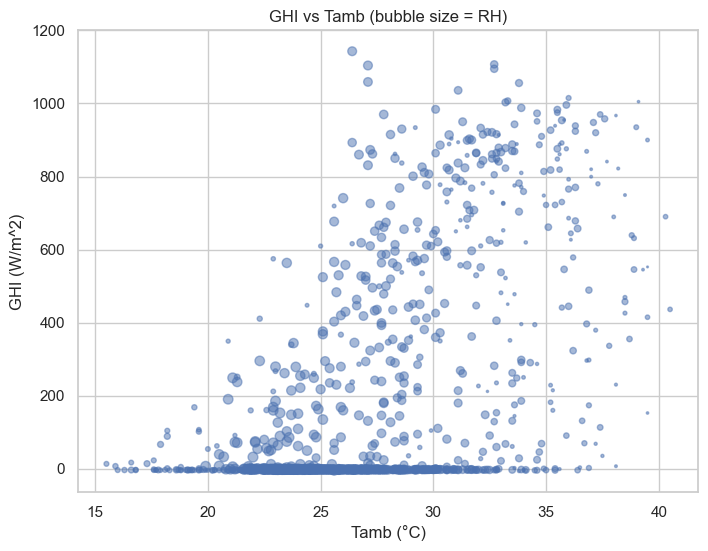

In [18]:
#  Bubble chart
sample = df.sample(1000)
plt.figure(figsize=(8,6))
plt.scatter(sample['Tamb'], sample['GHI'], s=(sample['RH']*0.5), alpha=0.5)
plt.xlabel('Tamb (°C)')
plt.ylabel('GHI (W/m^2)')
plt.title('GHI vs Tamb (bubble size = RH)')
plt.show()
